# Case Study 2C
## Predicting Customer Engagement

In [1]:
%load_ext autoreload
%autoreload 2

import helpers as hp

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

Let's find the continuous features and then (one-hot) encode the categorical features. Then we'll build a model and make some predictions.

In [3]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if
                                     x == 'Yes' else 0)

target = df['Engaged']
df.drop(['Engaged', 'Response', 'Customer'], axis=1, inplace=True)
df.head()

,State,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df_encoded = hp.encode_features(df)
df_encoded.columns = [x.replace(' ', '.') for x in
                      df_encoded.columns]
print('We now have ' + str(len(df_encoded.columns)) + ' features.')
df_encoded.head()

We now have 121 features.


,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Gender_label,State.Arizona,...,Sales.Channel.Web,Vehicle.Class.Four-Door.Car,Vehicle.Class.Luxury.Car,Vehicle.Class.Luxury.SUV,Vehicle.Class.SUV,Vehicle.Class.Sports.Car,Vehicle.Class.Two-Door.Car,Vehicle.Size.Large,Vehicle.Size.Medsize,Vehicle.Size.Small
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,1,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,1,0,0,0,0,0,0,1,0


## Fit a Random Forest Classifier
We are going to fit the data to a random forest classifier with 200 decision trees and a maximum depth of 5. 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    df_encoded, target, test_size=0.3
)

rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=5
)

rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Alright, so we now have 200 decision trees with a max depth of 5. Let's look at what the first tree predicts from our test set, just for illustration.

In [6]:
rf_model.estimators_[0].predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

The result is an array of 1's and 0's which represent engagement and non-engagement for the data points in our test set (with all of our numerical and encoded categorical features). Cool! Each tree in the ensemble will give different results.

Now let's look at the feature importances, because understanding that is often just as important (if not more) than making predictions.

In [7]:
fi_df = pd.DataFrame(
    list(zip(rf_model.feature_importances_, df_encoded.columns))
)
fi_df.columns = ['Importance', 'Feature']
fi_df.sort_values(by='Importance', ascending=False).head(10)

,Importance,Feature
84,0.201917,EmploymentStatus.Retired
105,0.079383,Renew.Offer.Type.Offer2
107,0.073919,Renew.Offer.Type.Offer4
106,0.056043,Renew.Offer.Type.Offer3
1,0.049596,Income
7,0.045887,Total.Claim.Amount
87,0.041175,Location.Code.Suburban
0,0.034806,Customer.Lifetime.Value
89,0.032691,Marital.Status.Divorced
2,0.030290,Monthly.Premium.Auto


How can we interpret this result? This would require further study, but let's comment on what we're seeing here. These results tell us the most important features are, but they don't tell us exactly how they affect the customer engagement (whether or not they are positively or negatively correlated). 

However, we can appreciate that a person's employment status is quite influential in how they are responding to ads, perhaps because retired people generally have more free time than employed people. In addition, the type of offer is naturally a big factor that decides whether a customer will engage. Some offers are better than others - this is why marketing is a profession. We saw in a previous case study that agents are the sales channel with the highest customer engagement - and that makes sense. 

Customer Lifetime Value could be one of those parameters that is highly correlated with marketing engagement - customers who are likely to respond to ads are likely to spend money, at least that's the simplistic view of engagement. This is just to say that CLV packs a lot of information in it about customer behaviour - how they have responded to ads in the past, their other features, etc. We will actually try to predict CLV in the next case study.

## Evaluate the Classifier using Model Metrics
We are going to evaluate the random forest classifier by calculating its accuracy, precision, recall, and finally, the receiver operating characteristic (ROC) curve / area under curve (AUC). We assume that the reader is familiar with these terms. Further reading can be found here:

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

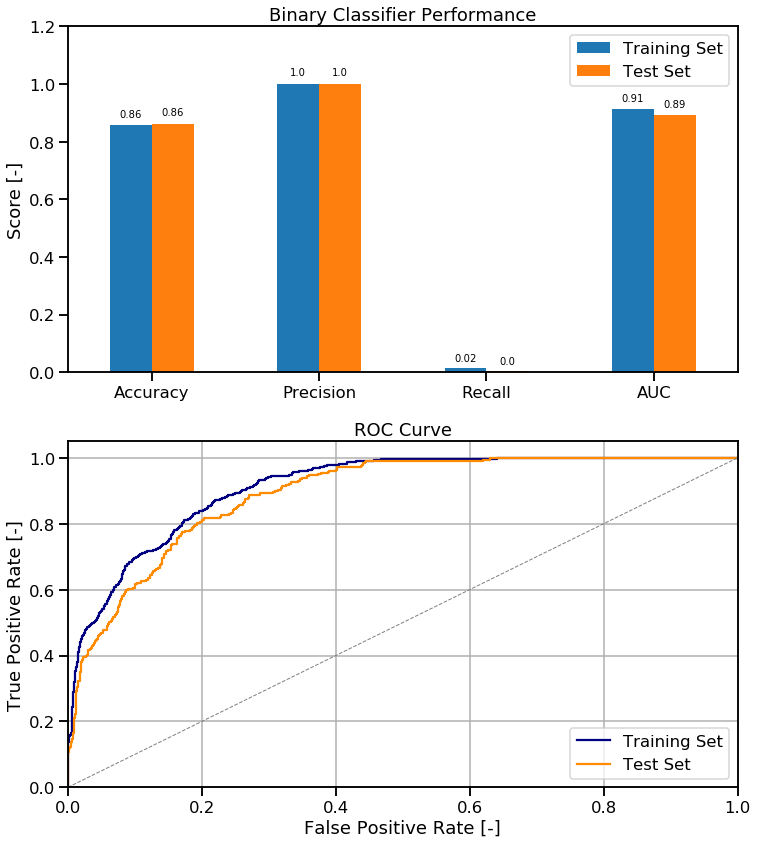

In [8]:
fig1, ax1 = hp.visualize_model_performance(
    x_train, x_test, y_train, y_test, rf_model
)

Wow, this model is really consistent between the train and test sets! And it has an accuracy of 86%! Wait a minute...

Since we have a very unbalanced dataset (Case Study 4 showed that the baseline engagement rate is about 14%), accuracy doesn't matter so much. Accuracy is *more or less* irrelevant on its own when dealing with imbalanced datasets. If you miss all 14% of the engagement, you could still have an accuracy of 86%, and that is essentially what we're getting here! So basically, this model is predicting almost no engagement.

This is why we look at precision, recall, and AUC together with accuracy. A precision score of 1.0 should immediately raise red flags. The model is very good at avoiding false positives. It is too good at it - so good that it is not catching most of the true positives! A really low recall score shows that the model is no good at avoiding false negatives. An AUC score of 0.92/0.87 shows us that this is a decent model - we just need to change our probability threshold a bit. Let's do that.

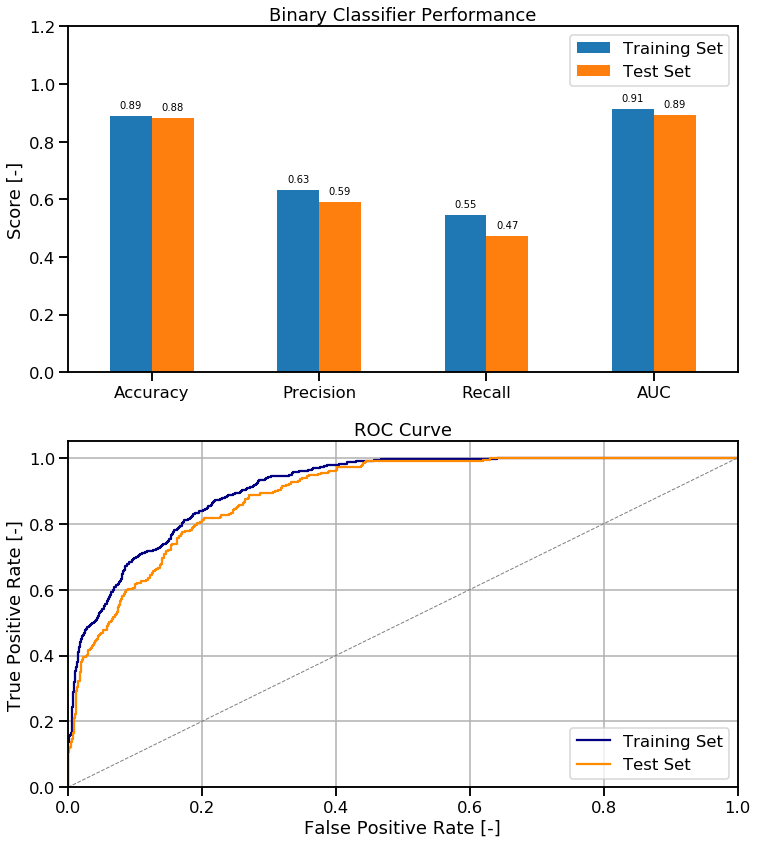

In [9]:
fig2, ax2 = hp.visualize_model_performance(
    x_train, x_test, y_train, y_test, rf_model, threshold=0.2
)

Since we changed our probability threshold to 0.2, we have decreased our true positive rate (thus decreasing our precision score) but we have also decreased our false positive rate (increaseing our recall)! Tweaking thresholds for a binary classifier is really a function of what the goal is. 

If we have a tight marketing budget, we want to maximize the true positive rate (precision) at the expense of recall by using a high probability threshold. However, we must be careful not to reach a precision of 1, since that usually means we are going to market to only a handful of people (or maybe even no people)!

If we want to reach as many people as we can and don't care about no-replies, we want to maximize the recall at the expense of precision by lowering the probability threshold.